# Load Libraries

In [21]:
library(data.table)

In [22]:
library(ggplot2)
library(dplyr)

In [23]:
#install.packages("fpc")
library(fpc)

# Load Data

In [24]:
water_data <- read.table("water-treatment.data_.txt", sep = ",", header = F, na.strings = c("?"))

In [25]:
setDT(water_data)

In [26]:
head(water_data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39
D-1/3/90,44101,1.5,7.8,NA,407,166,66.3,4.5,2110,...,2000,NA,58.8,95.5,NA,70.0,NA,79.4,87.3,99.6
D-2/3/90,39024,3.0,7.7,NA,443,214,69.2,6.5,2660,...,2590,NA,60.7,94.8,NA,80.8,NA,79.5,92.1,100.0
D-4/3/90,32229,5.0,7.6,NA,528,186,69.9,3.4,1666,...,1888,NA,58.2,95.6,NA,52.9,NA,75.8,88.7,98.5
D-5/3/90,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
D-6/3/90,36924,1.5,8.0,242,496,176,64.8,4.0,2110,...,2120,NA,62.7,95.6,NA,71.0,92.1,78.2,87.5,99.5
D-7/3/90,38572,3.0,7.8,202,372,186,68.8,4.5,1644,...,1764,NA,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100.0


# Check for missing values

In [27]:
colSums(is.na(water_data))

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 
  0  18   3   0  23   6   1  11  25   0   0  40   0  11  24   0   0  28   9   2 
V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 
 13  25   0   1  23  18   5  17  28   1  62   4  27  40  26  36  25   8  31

# Impute missing values

In [30]:
for(i in colnames(water_data)[!(colnames(water_data) %in% c("V1"))])
set(x = water_data,i = which(is.na(water_data[[i]])), j = i, value = median(water_data[[i]], na.rm = T))

Warning message in set(x = water_data, i = which(is.na(water_data[[i]])), j = i, :
"Coerced double RHS to integer to match the type of the target column (column 5 named 'V5'). One or more RHS values contain fractions which have been lost; e.g. item 1 with value 182.500000 has been truncated to 182."

In [31]:
scaled_wd <- scale(water_data[,-c("V1"), with=F])

# Scaling the variables

In [32]:
d <- dist(scaled_wd, method = "euclidean")

# Hierarchial Clustering

In [33]:
h_clust <- hclust(d, method = "ward") #clustering

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


# Dendogram

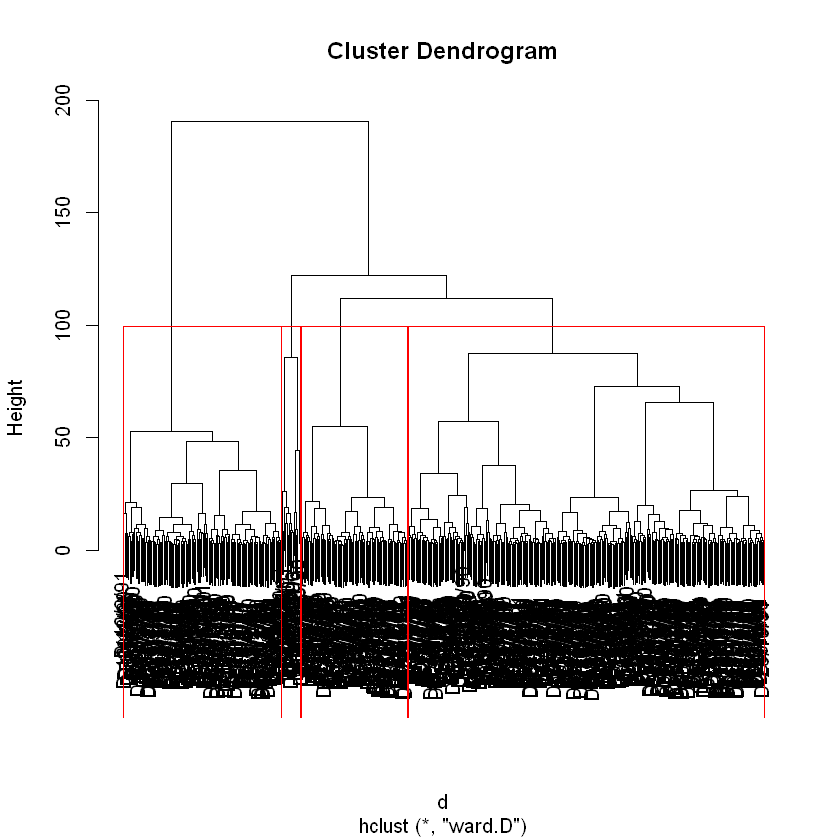

In [38]:
plot(h_clust,labels = water_data$V1)
rect.hclust(h_clust,k=4)

# Extract Clusters

groups <- cutree(h_clust,k=4)
groups

# PCA

In [40]:
pcmp <- princomp(scaled_wd)
pred_pc <- predict(pcmp, newdata=scaled_wd)[,1:2]

In [41]:
comp_dt <- cbind(as.data.table(pred_pc),cluster = as.factor(groups), Labels = water_data$V1)

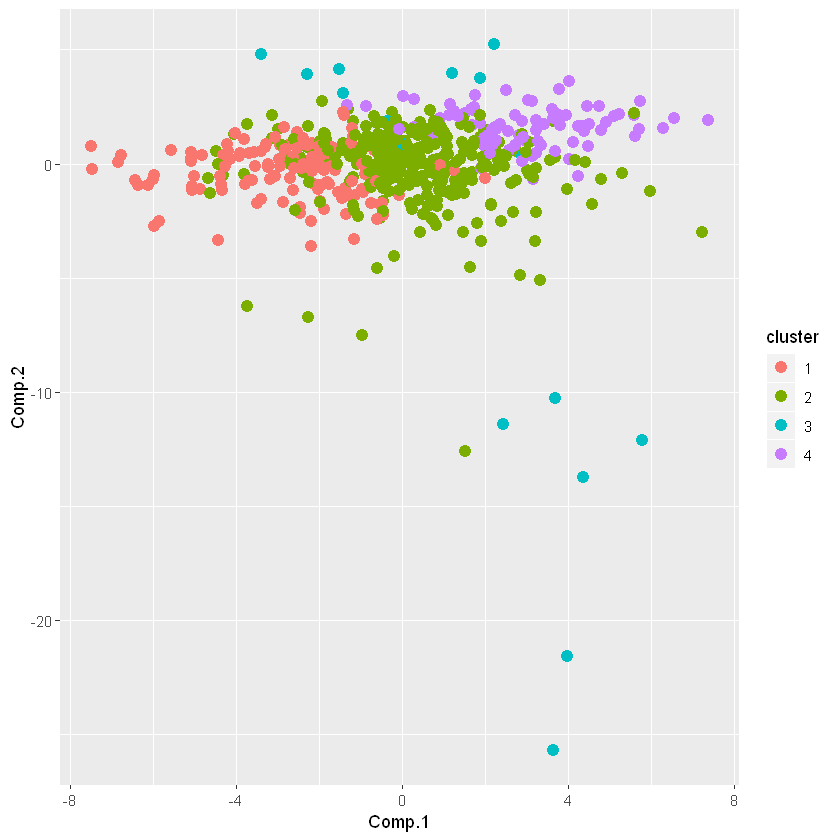

In [42]:
ggplot(comp_dt,aes(Comp.1,Comp.2))+ geom_point(aes(color = cluster),size=3)

# Kmeans

In [43]:
 kclust <- kmeans(scaled_wd,centers = 4,iter.max = 100)

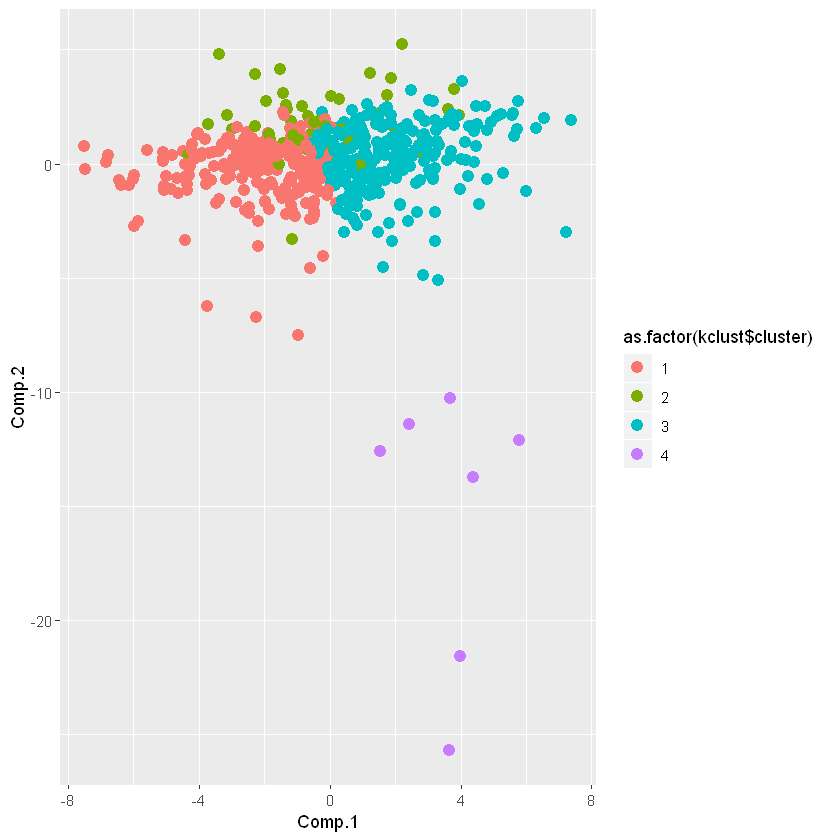

In [44]:
ggplot(comp_dt,aes(Comp.1,Comp.2))+ geom_point(aes(color = as.factor(kclust$cluster)),size=3)

In [47]:
tunek <- kmeansruns(scaled_wd,krange = 1:10,criterion = "ch") 

In [48]:
tunek$bestk #3

[1] 3

In [49]:
tunekw <- kmeansruns(scaled_wd,krange = 1:10,criterion = "asw")

In [50]:
tunekw$bestk

[1] 4